# Análise da taxa de câmbio do DOLAR ao longo do tempo

Nesse estudo, será analisado como a taxa de câmbio entre o dolar e o real se comportou ao longo do tempo. Para isso, serão analisadas tanto a taxa de câmbio do dolar comercial quanto do dolar paralelo. O interessante de avaliar a taxa do mercado paralelo é verificar se, em momentos onde a taxa comercial é controlada, a taxa do mercado paralelo segue de maneira mais real a taxa verdadeira. 

O valor da taxa de câmbio será ajustado tanto pela inflação brasileira quanto pela inflação americana. 

Várias informações podem ser obtidos no [IPEAData](http://ipeadata.gov.br) e será utilizada a biblioteca [`ipeadatapy`](https://github.com/luanborelli/ipeadatapy/) para acesso a esses dados.

In [1]:
import ipeadatapy as idpy

Serão utilizadas as seguintes séries mensais:

- Taxa de câmbio - `R$ / US$` - comercial - venda - fim período
- Taxa de câmbio - `R$ / US$` - paralelo - venda - fim período

In [2]:
idpy.list_series(name='Taxa de câmbio - R$ / US$ - comercial - venda - fim período')

,CODE,NAME
3964,BM_ERVF,Taxa de câmbio - R$ / US$ - comercial - venda ...
3970,BM12_ERVF12,Taxa de câmbio - R$ / US$ - comercial - venda ...


In [3]:
idpy.list_series(name='Taxa de câmbio - R$ / US$ - paralelo - venda - fim período')

,CODE,NAME
4058,GM12_BLACKF12,Taxa de câmbio - R$ / US$ - paralelo - venda -...


In [4]:
idpy.describe('BM12_ERVF12')

,Taxa de câmbio - R$ / US$ - comercial - venda - fim período
Name,Taxa de câmbio - R$ / US$ - comercial - venda ...
Code,BM12_ERVF12
Big Theme,Macroeconômico
Theme,Câmbio
Source,"Banco Central do Brasil, Boletim, Seção Balanç..."
Source acronym,Bacen/Boletim/BP
Comment,Taxa de câmbio é o preço de uma moeda estrange...
Last update,2021-05-07T19:10:00.55-03:00
Frequency,Mensal
Measure,R$


In [5]:
idpy.describe('BM_ERVF')

,Taxa de câmbio - R$ / US$ - comercial - venda - fim período
Name,Taxa de câmbio - R$ / US$ - comercial - venda ...
Code,BM_ERVF
Big Theme,Macroeconômico
Theme,Câmbio
Source,"Banco Central do Brasil, Boletim, Seção Balanç..."
Source acronym,Bacen/Boletim/BP
Comment,Taxa de câmbio é o preço de uma moeda estrange...
Last update,2021-01-06T05:00:00.843-03:00
Frequency,Anual
Measure,R$


In [6]:
idpy.describe('GM12_BLACKF12')

,Taxa de câmbio - R$ / US$ - paralelo - venda - fim período
Name,Taxa de câmbio - R$ / US$ - paralelo - venda -...
Code,GM12_BLACKF12
Big Theme,Macroeconômico
Theme,Câmbio
Source,Valor Econômico
Source acronym,Valor Econômico
Comment,Taxa de câmbio R$/US$ paralelo (valor de venda...
Last update,2016-03-16T17:43:40-03:00
Frequency,Mensal
Measure,R$


Como estamos interessado na análise mensal, serão utilizadas as séries `BM12_ERVF12` e `GM12_BLACKF12`.

In [7]:
dolar_comercial = idpy.timeseries("BM12_ERVF12")
dolar_comercial

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (R$)
DATE,,,,,,
1953-01-01,1953,1,1,BM12_ERVF12,1953-01-01T00:00:00-02:00,6.807273e-15
1953-02-01,1953,1,2,BM12_ERVF12,1953-02-01T00:00:00-02:00,1.527273e-14
1953-03-01,1953,1,3,BM12_ERVF12,1953-03-01T00:00:00-03:00,1.527273e-14
1953-04-01,1953,1,4,BM12_ERVF12,1953-04-01T00:00:00-03:00,1.454545e-14
1953-05-01,1953,1,5,BM12_ERVF12,1953-05-01T00:00:00-03:00,1.600000e-14
...,...,...,...,...,...,...
2020-12-01,2020,1,12,BM12_ERVF12,2020-12-01T00:00:00-03:00,5.196700e+00
2021-01-01,2021,1,1,BM12_ERVF12,2021-01-01T00:00:00-03:00,5.475900e+00
2021-02-01,2021,1,2,BM12_ERVF12,2021-02-01T00:00:00-03:00,5.530200e+00


Podemos observar que a série do dolar comercial inicia-se em janeiro/1953, indo até hoje.

In [8]:
dolar_paralelo = idpy.timeseries('GM12_BLACKF12')
dolar_paralelo

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (R$)
DATE,,,,,,
1947-09-01,1947,1,9,GM12_BLACKF12,1947-09-01T00:00:00-03:00,8.363636e-15
1947-10-01,1947,1,10,GM12_BLACKF12,1947-10-01T00:00:00-03:00,8.181818e-15
1947-11-01,1947,1,11,GM12_BLACKF12,1947-11-01T00:00:00-03:00,8.363636e-15
1947-12-01,1947,1,12,GM12_BLACKF12,1947-12-01T00:00:00-02:00,8.454545e-15
1948-01-01,1948,1,1,GM12_BLACKF12,1948-01-01T00:00:00-02:00,8.418182e-15
...,...,...,...,...,...,...
2015-10-01,2015,1,10,GM12_BLACKF12,2015-10-01T00:00:00-03:00,4.070000e+00
2015-11-01,2015,1,11,GM12_BLACKF12,2015-11-01T00:00:00-02:00,4.040000e+00
2015-12-01,2015,1,12,GM12_BLACKF12,2015-12-01T00:00:00-02:00,4.140000e+00


Podemos observar que a série do dolar paralelo inicia-se em setembro/1947, encerrando em fevereiro/2016.

Faremos um gráfico das duas séries, em escala logarítmica.

In [9]:
import matplotlib.pyplot as plt

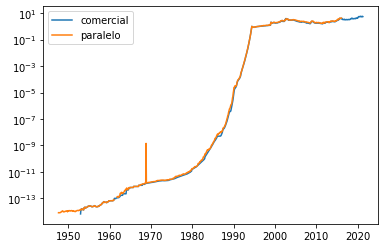

In [10]:
fig = plt.figure()
plt.plot(dolar_comercial['VALUE (R$)'], label = 'comercial')
plt.plot(dolar_paralelo['VALUE (R$)'], label = 'paralelo')
plt.legend()
plt.yscale('log')
plt.show()

Observamos que há um pico no gráfico do dolar paralelo, próximo de 1970, que precisa ser verificado.

In [11]:
df = dolar_paralelo.loc['1965-01-01':'1970-01-01']
print(df['VALUE (R$)'].describe())


count    6.100000e+01
mean     2.472675e-11
std      1.844643e-10
min      6.709091e-13
25%      8.090909e-13
50%      1.010909e-12
75%      1.418182e-12
max      1.441818e-09
Name: VALUE (R$), dtype: float64


Podemos observar que, reduzindo-se o intervalo da série para o intervalo entre 1965 e 1970, identificamos que o valor máximo é muito discrepante em relação a média.

In [12]:
df[['VALUE (R$)']].idxmax()

VALUE (R$)   1968-11-01
dtype: datetime64[ns]

In [13]:
df.loc['1968-05-01':'1969-05-01']

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (R$)
DATE,,,,,,
1968-05-01,1968,1,5,GM12_BLACKF12,1968-05-01T00:00:00-03:00,1.338182e-12
1968-06-01,1968,1,6,GM12_BLACKF12,1968-06-01T00:00:00-03:00,1.345455e-12
1968-07-01,1968,1,7,GM12_BLACKF12,1968-07-01T00:00:00-03:00,1.309091e-12
1968-08-01,1968,1,8,GM12_BLACKF12,1968-08-01T00:00:00-03:00,1.392727e-12
1968-09-01,1968,1,9,GM12_BLACKF12,1968-09-01T00:00:00-03:00,1.400000e-12
1968-10-01,1968,1,10,GM12_BLACKF12,1968-10-01T00:00:00-03:00,1.418182e-12
1968-11-01,1968,1,11,GM12_BLACKF12,1968-11-01T00:00:00-03:00,1.441818e-09
1968-12-01,1968,1,12,GM12_BLACKF12,1968-12-01T00:00:00-02:00,1.563636e-12
1969-01-01,1969,1,1,GM12_BLACKF12,1969-01-01T00:00:00-02:00,1.545455e-12


Podemos observar que, aparentemente, há um erro no expoente. Deveria ser E**-12 quando é E**-9. As mantissas estão coerentes. Vamos atualizar esse valor e fazer novamente o gráfico para conferir.

In [14]:
df.loc['1968-11-01','VALUE (R$)']

1.44181818181818e-09

In [15]:

dolar_paralelo.loc['1968-11-01','VALUE (R$)'] = dolar_paralelo.loc['1968-11-01','VALUE (R$)'] /1000
dolar_paralelo.loc['1968-11-01','VALUE (R$)']

1.4418181818181802e-12

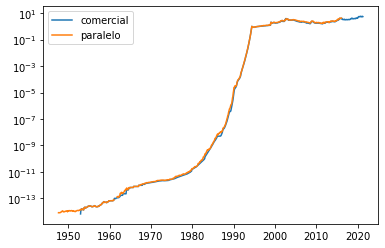

In [16]:
fig = plt.figure()
plt.plot(dolar_comercial['VALUE (R$)'], label = 'comercial')
plt.plot(dolar_paralelo['VALUE (R$)'], label = 'paralelo')
plt.legend()
plt.yscale('log')
plt.show()

Verificamos que o pico sumiu.

Para o ajuste da taxa de câmbio pela inflação brasileira, o ideal seria a utilização do IPCA, que é o índice utilizado atualmente pelo Banco Central para acompnhar a inflação, mas esse índice foi criado apenas na década de 80, e não cobre o período total das taxas de câmbio. O IGP-DI é mais antigo, servindo melhor aos propósitos da análise em uma escala de tempo maior. De qualquer maneira, será realizadas análises com os 2 índices de inflação.

Serão utilizadas as seguintes séries mensais:

- Preços - IGP-DI - geral - índice (ago. 1994 = 100)
- Preços - IPCA - geral - índice (dez. 1993 = 100)

In [17]:
idpy.list_series(name='Preços - IGP-DI - geral - índice (ago. 1994 = 100)')

,CODE,NAME
4782,IGP_IGP,Preços - IGP-DI - geral - índice (ago. 1994 = ...
4812,IGP12_IGPDI12,Preços - IGP-DI - geral - índice (ago. 1994 = ...


In [18]:
idpy.list_series(name='Preços - IPCA - geral - índice (dez. 1993 = 100)')

,CODE,NAME
4992,PRECOS12_IPCA12,Preços - IPCA - geral - índice (dez. 1993 = 100)


In [19]:
idpy.describe('IGP_IGP')

,Preços - IGP-DI - geral - índice (ago. 1994 = 100)
Name,Preços - IGP-DI - geral - índice (ago. 1994 = ...
Code,IGP_IGP
Big Theme,Macroeconômico
Theme,Preços
Source,"Fundação Getulio Vargas, Conjuntura Econômica ..."
Source acronym,FGV/Conj. Econ. - IGP
Comment,Os índices de preços medem a variação média do...
Last update,2021-01-08T16:20:00.723-03:00
Frequency,Anual
Measure,-


In [20]:

idpy.describe('IGP12_IGPDI12')

,Preços - IGP-DI - geral - índice (ago. 1994 = 100)
Name,Preços - IGP-DI - geral - índice (ago. 1994 = ...
Code,IGP12_IGPDI12
Big Theme,Macroeconômico
Theme,Preços
Source,"Fundação Getulio Vargas, Conjuntura Econômica ..."
Source acronym,FGV/Conj. Econ. - IGP
Comment,Os índices de preços medem a variação média do...
Last update,2021-05-07T14:00:00.6-03:00
Frequency,Mensal
Measure,-


In [21]:
idpy.describe('PRECOS12_IPCA12')

,Preços - IPCA - geral - índice (dez. 1993 = 100)
Name,Preços - IPCA - geral - índice (dez. 1993 = 100)
Code,PRECOS12_IPCA12
Big Theme,Macroeconômico
Theme,Preços
Source,Instituto Brasileiro de Geografia e Estatístic...
Source acronym,IBGE/SNIPC
Comment,Os índices de preços medem a variação média do...
Last update,2021-05-11T10:02:00.847-03:00
Frequency,Mensal
Measure,-


Como estamos interessado na análise mensal, serão utilizadas as séries `IGP12_IGPDI12` e `PRECOS12_IPCA12`.

In [23]:
igp_di = idpy.timeseries('IGP12_IGPDI12')
igp_di

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (-)
DATE,,,,,,
1944-01-01,1944,1,1,IGP12_IGPDI12,1944-01-01T00:00:00-02:00,8.371376e-14
1944-02-01,1944,1,2,IGP12_IGPDI12,1944-02-01T00:00:00-02:00,8.492700e-14
1944-03-01,1944,1,3,IGP12_IGPDI12,1944-03-01T00:00:00-03:00,8.614024e-14
1944-04-01,1944,1,4,IGP12_IGPDI12,1944-04-01T00:00:00-03:00,8.735348e-14
1944-05-01,1944,1,5,IGP12_IGPDI12,1944-05-01T00:00:00-03:00,8.856673e-14
...,...,...,...,...,...,...
2020-12-01,2020,1,12,IGP12_IGPDI12,2020-12-01T00:00:00-03:00,9.245040e+02
2021-01-01,2021,1,1,IGP12_IGPDI12,2021-01-01T00:00:00-03:00,9.513950e+02
2021-02-01,2021,1,2,IGP12_IGPDI12,2021-02-01T00:00:00-03:00,9.771330e+02


Podemos observar que a série do IGP-DI inicia-se em janeiro/1944, indo até hoje.

In [24]:
ipca = idpy.timeseries('PRECOS12_IPCA12')
ipca

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (-)
DATE,,,,,,
1979-12-01,1979,1,12,PRECOS12_IPCA12,1979-12-01T00:00:00-02:00,7.618300e-09
1980-01-01,1980,1,1,PRECOS12_IPCA12,1980-01-01T00:00:00-02:00,8.122300e-09
1980-02-01,1980,1,2,PRECOS12_IPCA12,1980-02-01T00:00:00-02:00,8.497300e-09
1980-03-01,1980,1,3,PRECOS12_IPCA12,1980-03-01T00:00:00-03:00,9.010400e-09
1980-04-01,1980,1,4,PRECOS12_IPCA12,1980-04-01T00:00:00-03:00,9.486700e-09
...,...,...,...,...,...,...
2020-12-01,2020,1,12,PRECOS12_IPCA12,2020-12-01T00:00:00-03:00,5.560590e+03
2021-01-01,2021,1,1,PRECOS12_IPCA12,2021-01-01T00:00:00-03:00,5.574490e+03
2021-02-01,2021,1,2,PRECOS12_IPCA12,2021-02-01T00:00:00-03:00,5.622430e+03


Podemos observar que a série do IPCA inicia-se em dezembro/1979, indo até hoje.

Para se ajustar os valores do dolar pela inflação, é necessário uma data de referência. Inicialmente, vamos considerar a data mais recente do índice de inflação.

In [25]:
last_igp = igp_di['VALUE (-)'].iat[-1]
print(last_igp)

1020.495


In [26]:
last_ipca = ipca['VALUE (-)'].iat[-1]
print(last_ipca)

5692.31


Vamos criar um novo `dataframe` com as colunas do dolar ajustadas pelos índicies de inflação.

In [27]:
from pandas.core.frame import DataFrame

In [28]:
dolar = DataFrame()
dolar['comercial'] = dolar_comercial['VALUE (R$)']
dolar['paralelo'] = dolar_paralelo['VALUE (R$)']
dolar['igp'] = igp_di['VALUE (-)']
dolar['ipca'] = ipca['VALUE (-)']
dolar['comercial_igp_atual'] = dolar['comercial'] * last_igp/dolar['igp']
dolar['paralelo_igp_atual'] = dolar['paralelo'] * last_igp/dolar['igp']
dolar['comercial_ipca_atual'] = dolar['comercial'] * last_ipca/dolar['ipca']
dolar['paralelo_ipca_atual'] = dolar['paralelo'] * last_ipca/dolar['ipca']
dolar

,comercial,paralelo,igp,ipca,comercial_igp_atual,paralelo_igp_atual,comercial_ipca_atual,paralelo_ipca_atual
DATE,,,,,,,,
1953-01-01,6.807273e-15,1.392727e-14,2.390088e-13,NaN,29.064987,59.465225,NaN,NaN
1953-02-01,1.527273e-14,1.381818e-14,2.414353e-13,NaN,64.554528,58.406478,NaN,NaN
1953-03-01,1.527273e-14,1.527273e-14,2.475015e-13,NaN,62.972313,62.972313,NaN,NaN
1953-04-01,1.454545e-14,1.454545e-14,2.475015e-13,NaN,59.973631,59.973631,NaN,NaN
1953-05-01,1.600000e-14,1.600000e-14,2.462883e-13,NaN,66.295963,66.295963,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-01,5.196700e+00,NaN,9.245040e+02,5560.59,5.736272,NaN,5.319800,NaN
2021-01-01,5.475900e+00,NaN,9.513950e+02,5574.49,5.873616,NaN,5.591636,NaN
2021-02-01,5.530200e+00,NaN,9.771330e+02,5622.43,5.775612,NaN,5.598934,NaN


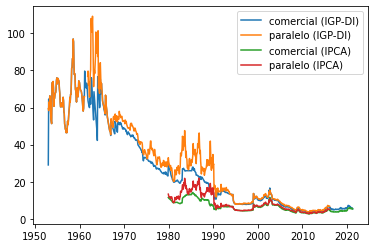

In [29]:
fig = plt.figure()
plt.plot(dolar['comercial_igp_atual'], label = 'comercial (IGP-DI)')
plt.plot(dolar['paralelo_igp_atual'], label = 'paralelo (IGP-DI)')
plt.plot(dolar['comercial_ipca_atual'], label = 'comercial (IPCA)')
plt.plot(dolar['paralelo_ipca_atual'], label = 'paralelo (IPCA)')
plt.legend()
plt.show()

Com relação ao índice de inflação americana, embora o IPEAData tenha os dados do CPI, essa série não está disponível na API. 

Os dados da inflação americana (Consumer Price Index for All Urban Consumers: All Items in U.S. City Average) estão disóníveis no [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/) e será utilizada a biblioteca `pandas_datareaader` para acesso a esses dados. 

In [30]:
import pandas_datareader.data as web
import datetime

In [31]:
start = datetime.datetime(1940, 1, 1)
cpi = web.DataReader('CPIAUCSL', 'fred', start )
cpi

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2020-12-01,261.560
2021-01-01,262.231
2021-02-01,263.161


Podemos observar que a série do CPI inicia-se em janeiro/1947, indo até hoje.

In [32]:
last_cpi = cpi['CPIAUCSL'].iat[-1]
print(last_cpi)

266.832


In [33]:
dolar['cpi'] = cpi

In [34]:
dolar['comercial_igp_cpi_atual'] = dolar['comercial_igp_atual']*dolar['cpi']/last_cpi
dolar['paralelo_igp_cpi_atual'] = dolar['paralelo_igp_atual']*dolar['cpi']/last_cpi
dolar['comercial_ipca_cpi_atual'] = dolar['comercial_ipca_atual']*dolar['cpi']/last_cpi
dolar['paralelo_ipca_cpi_atual'] = dolar['paralelo_ipca_atual']*dolar['cpi']/last_cpi
dolar

,comercial,paralelo,igp,ipca,comercial_igp_atual,paralelo_igp_atual,comercial_ipca_atual,paralelo_ipca_atual,cpi,comercial_igp_cpi_atual,paralelo_igp_cpi_atual,comercial_ipca_cpi_atual,paralelo_ipca_cpi_atual
DATE,,,,,,,,,,,,,
1953-01-01,6.807273e-15,1.392727e-14,2.390088e-13,NaN,29.064987,59.465225,NaN,NaN,26.640,2.901793,5.936895,NaN,NaN
1953-02-01,1.527273e-14,1.381818e-14,2.414353e-13,NaN,64.554528,58.406478,NaN,NaN,26.590,6.432905,5.820247,NaN,NaN
1953-03-01,1.527273e-14,1.527273e-14,2.475015e-13,NaN,62.972313,62.972313,NaN,NaN,26.630,6.284676,6.284676,NaN,NaN
1953-04-01,1.454545e-14,1.454545e-14,2.475015e-13,NaN,59.973631,59.973631,NaN,NaN,26.690,5.998891,5.998891,NaN,NaN
1953-05-01,1.600000e-14,1.600000e-14,2.462883e-13,NaN,66.295963,66.295963,NaN,NaN,26.700,6.633770,6.633770,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,5.196700e+00,NaN,9.245040e+02,5560.59,5.736272,NaN,5.319800,NaN,261.560,5.622936,NaN,5.214693,NaN
2021-01-01,5.475900e+00,NaN,9.513950e+02,5574.49,5.873616,NaN,5.591636,NaN,262.231,5.772337,NaN,5.495219,NaN
2021-02-01,5.530200e+00,NaN,9.771330e+02,5622.43,5.775612,NaN,5.598934,NaN,263.161,5.696153,NaN,5.521905,NaN


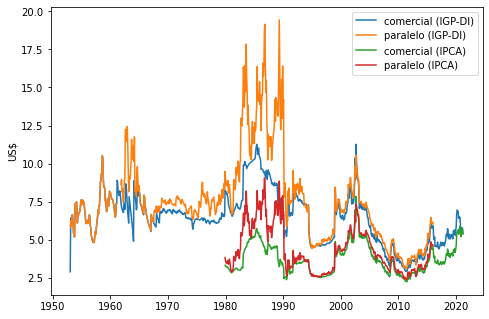

In [35]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(dolar['comercial_igp_cpi_atual'], label = 'comercial (IGP-DI)')
a1.plot(dolar['paralelo_igp_cpi_atual'], label = 'paralelo (IGP-DI)')
a1.plot(dolar['comercial_ipca_cpi_atual'], label = 'comercial (IPCA)')
a1.plot(dolar['paralelo_ipca_cpi_atual'], label = 'paralelo (IPCA)')
a1.set_ylabel('US$')

plt.legend()
plt.show()

In [36]:
dolar['comercial_igp_cpi_atual'].describe()

count    820.000000
mean       6.467079
std        1.694978
min        2.901793
25%        5.166251
50%        6.545576
75%        7.378115
max       11.269869
Name: comercial_igp_cpi_atual, dtype: float64

In [37]:
dolar['comercial_ipca_cpi_atual'].describe()

count    497.000000
mean       3.757318
std        1.010229
min        2.250686
25%        2.893273
50%        3.545807
75%        4.467574
max        7.848065
Name: comercial_ipca_cpi_atual, dtype: float64

Vamos apurar como a inflação se comportou ao longo desse tempo:

In [38]:
dolar['pct_igp'] = 100*dolar['igp'].pct_change()
dolar['pct_ipca'] = 100*dolar['ipca'].pct_change()
dolar

,comercial,paralelo,igp,ipca,comercial_igp_atual,paralelo_igp_atual,comercial_ipca_atual,paralelo_ipca_atual,cpi,comercial_igp_cpi_atual,paralelo_igp_cpi_atual,comercial_ipca_cpi_atual,paralelo_ipca_cpi_atual,pct_igp,pct_ipca
DATE,,,,,,,,,,,,,,,
1953-01-01,6.807273e-15,1.392727e-14,2.390088e-13,NaN,29.064987,59.465225,NaN,NaN,26.640,2.901793,5.936895,NaN,NaN,NaN,NaN
1953-02-01,1.527273e-14,1.381818e-14,2.414353e-13,NaN,64.554528,58.406478,NaN,NaN,26.590,6.432905,5.820247,NaN,NaN,1.015235,NaN
1953-03-01,1.527273e-14,1.527273e-14,2.475015e-13,NaN,62.972313,62.972313,NaN,NaN,26.630,6.284676,6.284676,NaN,NaN,2.512557,NaN
1953-04-01,1.454545e-14,1.454545e-14,2.475015e-13,NaN,59.973631,59.973631,NaN,NaN,26.690,5.998891,5.998891,NaN,NaN,0.000000,NaN
1953-05-01,1.600000e-14,1.600000e-14,2.462883e-13,NaN,66.295963,66.295963,NaN,NaN,26.700,6.633770,6.633770,NaN,NaN,-0.490179,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,5.196700e+00,NaN,9.245040e+02,5560.59,5.736272,NaN,5.319800,NaN,261.560,5.622936,NaN,5.214693,NaN,0.759206,1.350036
2021-01-01,5.475900e+00,NaN,9.513950e+02,5574.49,5.873616,NaN,5.591636,NaN,262.231,5.772337,NaN,5.495219,NaN,2.908695,0.249973
2021-02-01,5.530200e+00,NaN,9.771330e+02,5622.43,5.775612,NaN,5.598934,NaN,263.161,5.696153,NaN,5.521905,NaN,2.705291,0.859989


In [39]:
dolar['pct_igp'].describe()

count    819.000000
mean       4.812893
std        8.952054
min       -1.242690
25%        0.655648
50%        1.627225
75%        4.355622
max       81.319921
Name: pct_igp, dtype: float64

In [40]:
dolar['pct_ipca'].describe()

count    496.000000
mean       6.151154
std       11.017424
min       -0.509710
25%        0.369955
50%        0.779928
75%        7.354697
max       82.390000
Name: pct_ipca, dtype: float64

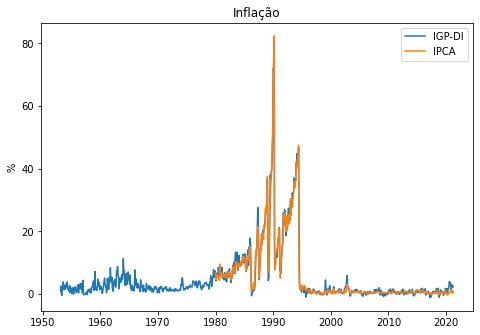

In [41]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
plt.title('Inflação')

a1.plot(dolar['pct_igp'], label = 'IGP-DI')
a1.plot(dolar['pct_ipca'], label = 'IPCA')
a1.set_ylabel('%')

plt.legend()
plt.show()

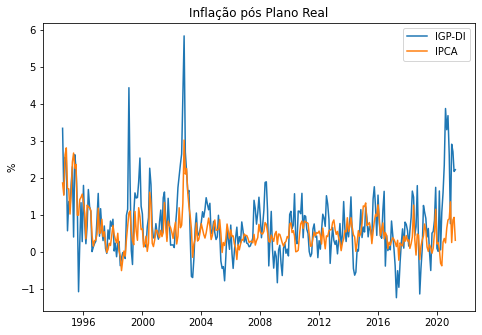

In [42]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
plt.title('Inflação pós Plano Real')

data_plano_real = '1994-07-01'
a1.plot(dolar[dolar.index > data_plano_real]['pct_igp'], label = 'IGP-DI')
a1.plot(dolar[dolar.index > data_plano_real]['pct_ipca'], label = 'IPCA')
a1.set_ylabel('%')

plt.legend()
plt.show()

In [43]:
dolar[dolar.index > data_plano_real]['pct_igp'].describe()

count    321.000000
mean       0.740589
std        0.905486
min       -1.242690
25%        0.183445
50%        0.587812
75%        1.131812
max        5.837570
Name: pct_igp, dtype: float64

In [44]:
dolar[dolar.index > data_plano_real]['pct_ipca'].describe()

count    321.000000
mean       0.572018
std        0.505374
min       -0.509710
25%        0.260099
50%        0.469988
75%        0.749863
max        3.020224
Name: pct_ipca, dtype: float64

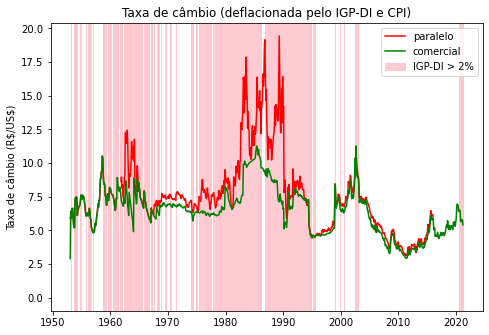

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Taxa de câmbio (deflacionada pelo IGP-DI e CPI)')
ax.set_ylabel('Taxa de câmbio (R\$/US\$)')

ax.plot(dolar['paralelo_igp_cpi_atual'], color='red', label = 'paralelo')
ax.plot(dolar['comercial_igp_cpi_atual'], color='green', label = 'comercial')

threshold = 2
ax.fill_between(dolar.index, 0, 1, where=dolar['pct_igp'] > threshold,
                color='lightpink', alpha=0.7, transform=ax.get_xaxis_transform(),
                label='IGP-DI > {}%'.format(threshold))

plt.legend(loc = 'upper right')

plt.show()

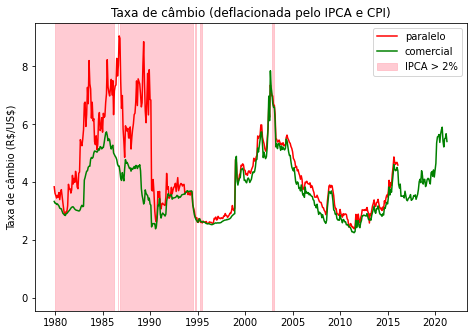

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Taxa de câmbio (deflacionada pelo IPCA e CPI)')
ax.set_ylabel('Taxa de câmbio (R\$/US\$)')

ax.plot(dolar['paralelo_ipca_cpi_atual'], color='red', label = 'paralelo')
ax.plot(dolar['comercial_ipca_cpi_atual'], color='green', label = 'comercial')

threshold = 2
ax.fill_between(dolar.index, 0, 1, where=dolar['pct_ipca'] > threshold,
                color='lightpink', alpha=0.7, transform=ax.get_xaxis_transform(),
                label='IPCA > {}%'.format(threshold))

plt.legend(loc = 'upper right')

plt.show()

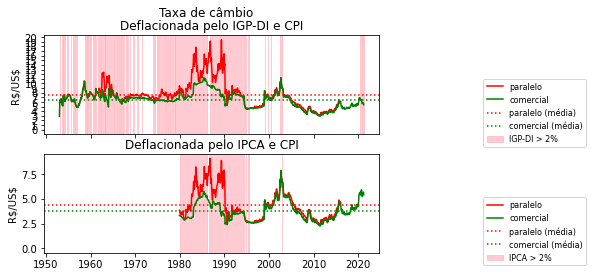

In [47]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Taxa de câmbio')

threshold = 2

ax1.set_ylabel('R\$/US\$')
ax1.set_title('Deflacionada pelo IGP-DI e CPI')

ax1.plot(dolar['paralelo_igp_cpi_atual'], color='red', label = 'paralelo')
ax1.plot(dolar['comercial_igp_cpi_atual'], color='green', label = 'comercial')
ax1.axhline(dolar['paralelo_igp_cpi_atual'].mean(), linestyle='dotted', color='red', label = 'paralelo (média)')
ax1.axhline(dolar['comercial_igp_cpi_atual'].mean(), linestyle='dotted', color='green', label = 'comercial (média)')

ax1.fill_between(dolar.index, 0, 1, where=dolar['pct_igp'] > threshold,
                color='lightpink', alpha=0.7, transform=ax1.get_xaxis_transform(),
                label='IGP-DI > {}%'.format(threshold))

ax1.legend(bbox_to_anchor=(1.3, 0.6),fontsize=8)
ax1.set_yticks(np.arange(0, 1 + max(dolar['paralelo_igp_cpi_atual'].max(),dolar['comercial_igp_cpi_atual'].max()), 1))
                
ax2.set_ylabel('R\$/US\$')
ax2.set_title('Deflacionada pelo IPCA e CPI')

ax2.plot(dolar['paralelo_ipca_cpi_atual'], color='red', label = 'paralelo')
ax2.plot(dolar['comercial_ipca_cpi_atual'], color='green', label = 'comercial')
ax2.axhline(dolar['paralelo_ipca_cpi_atual'].mean(), linestyle='dotted', color='red', label = 'paralelo (média)')
ax2.axhline(dolar['comercial_ipca_cpi_atual'].mean(), linestyle='dotted', color='green', label = 'comercial (média)')

ax2.fill_between(dolar.index, 0, 1, where=dolar['pct_ipca'] > threshold,
                color='lightpink', alpha=0.7, transform=ax2.get_xaxis_transform(),
                label='IPCA > {}%'.format(threshold))

ax2.legend(bbox_to_anchor=(1.3, 0.6),fontsize=8)

plt.show()